# Assignment is at the bottom! 

In [1]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from pylab import rcParams
rcParams['figure.figsize'] = 20, 10


from sklearn.linear_model import LogisticRegression as Model

In [2]:
y = np.concatenate([np.zeros(10), np.ones(10)])
x = np.linspace(0, 10, len(y))

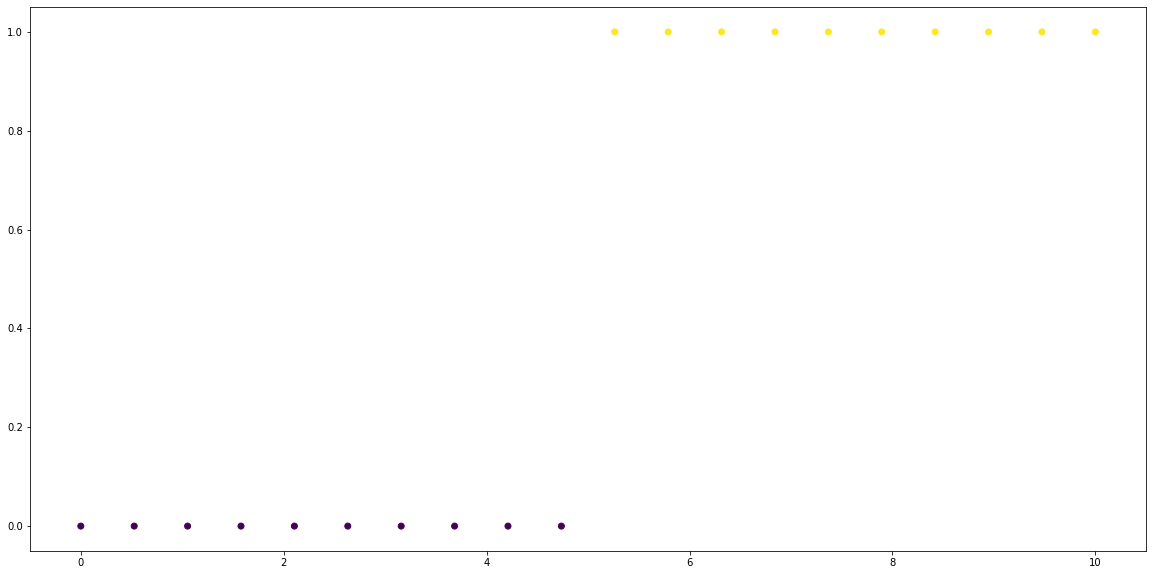

In [3]:
plt.scatter(x, y, c=y)

In [4]:
model = LogisticRegression()

In [5]:
model.fit(x.reshape(-1, 1),y)

LogisticRegression()

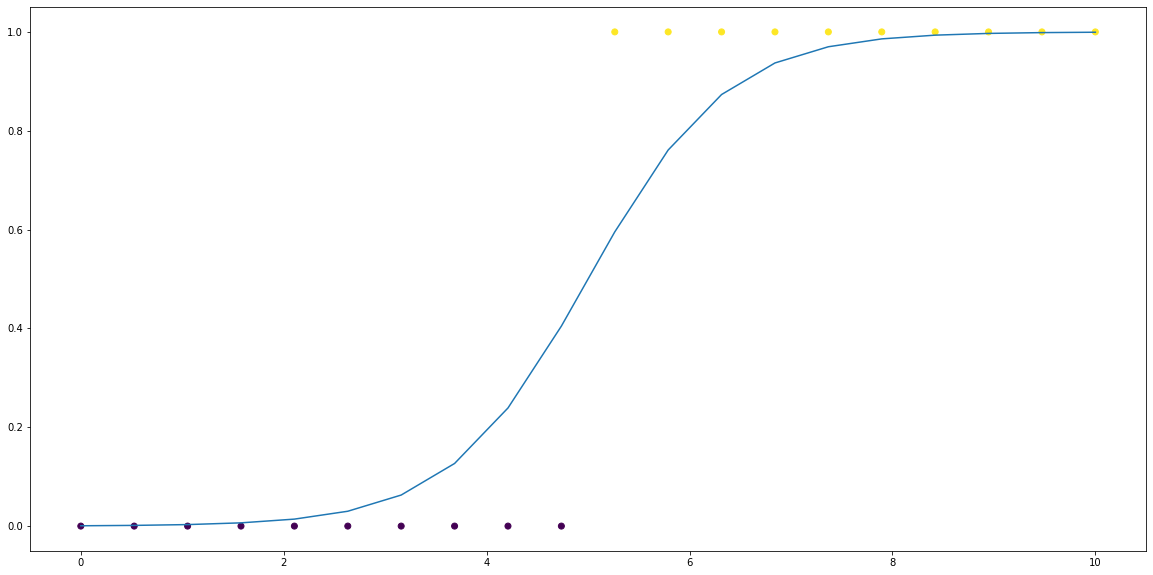

In [6]:
plt.scatter(x,y, c=y)
plt.plot(x, model.predict_proba(x.reshape(-1, 1))[:,1])

In [7]:
b, b0 = model.coef_, model.intercept_
model.coef_, model.intercept_

(array([[1.46709085]]), array([-7.33542562]))

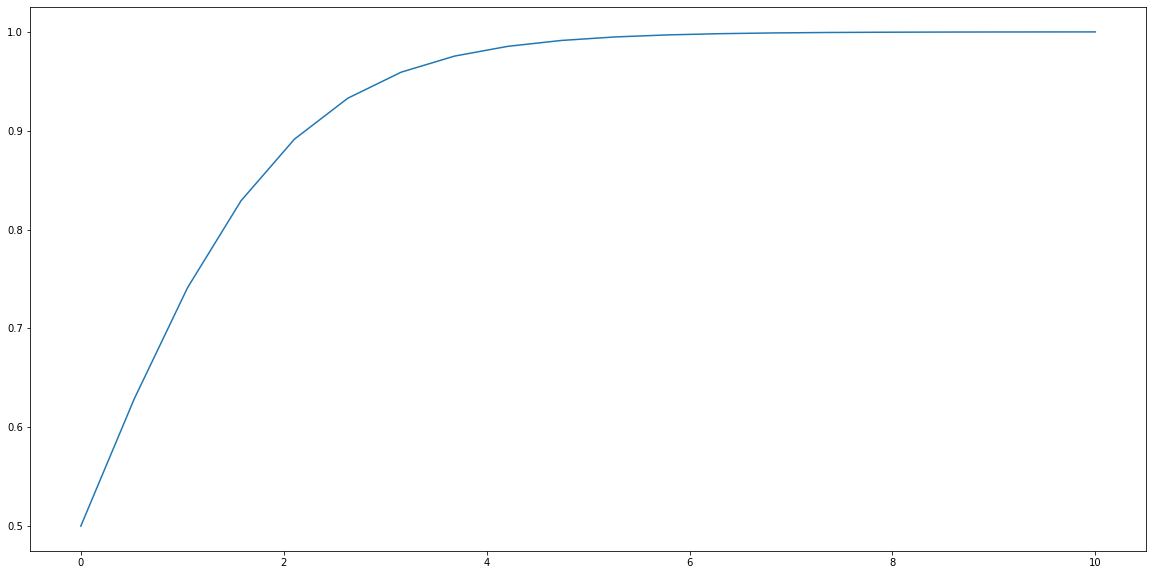

In [8]:
plt.plot(x, 1/(1+np.exp(-x)))

In [9]:
b

array([[1.46709085]])

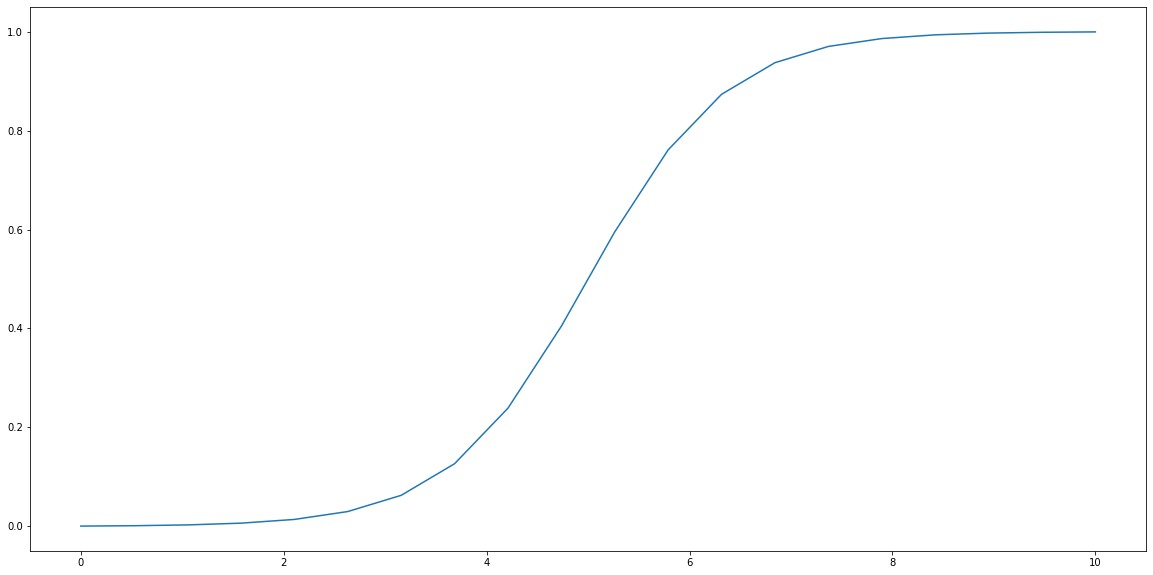

In [10]:
plt.plot(x, 1/(1+np.exp(-(b[0]*x +b0))))

C:\Users\gdlev\AppData\Local\Temp\ipykernel_6952\290434025.py:10: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


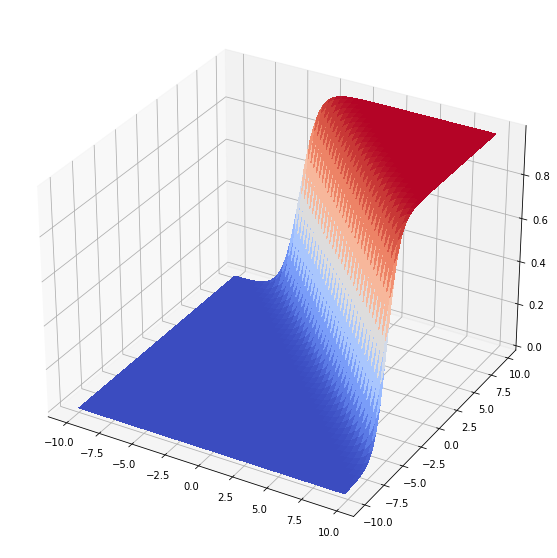

In [11]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-10, 10, 0.25)
Y = np.arange(-10, 10, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = 1/(1+np.exp(-(b[0]*X +b[0]*Y +b0)))
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)


In [12]:
X

array([[-10.  ,  -9.75,  -9.5 , ...,   9.25,   9.5 ,   9.75],
       [-10.  ,  -9.75,  -9.5 , ...,   9.25,   9.5 ,   9.75],
       [-10.  ,  -9.75,  -9.5 , ...,   9.25,   9.5 ,   9.75],
       ...,
       [-10.  ,  -9.75,  -9.5 , ...,   9.25,   9.5 ,   9.75],
       [-10.  ,  -9.75,  -9.5 , ...,   9.25,   9.5 ,   9.75],
       [-10.  ,  -9.75,  -9.5 , ...,   9.25,   9.5 ,   9.75]])

In [13]:
Y

array([[-10.  , -10.  , -10.  , ..., -10.  , -10.  , -10.  ],
       [ -9.75,  -9.75,  -9.75, ...,  -9.75,  -9.75,  -9.75],
       [ -9.5 ,  -9.5 ,  -9.5 , ...,  -9.5 ,  -9.5 ,  -9.5 ],
       ...,
       [  9.25,   9.25,   9.25, ...,   9.25,   9.25,   9.25],
       [  9.5 ,   9.5 ,   9.5 , ...,   9.5 ,   9.5 ,   9.5 ],
       [  9.75,   9.75,   9.75, ...,   9.75,   9.75,   9.75]])

What if the data doesn't really fit this pattern?

In [14]:
y = np.concatenate([np.zeros(10), np.ones(10), np.zeros(10)])
x = np.linspace(0, 10, len(y))

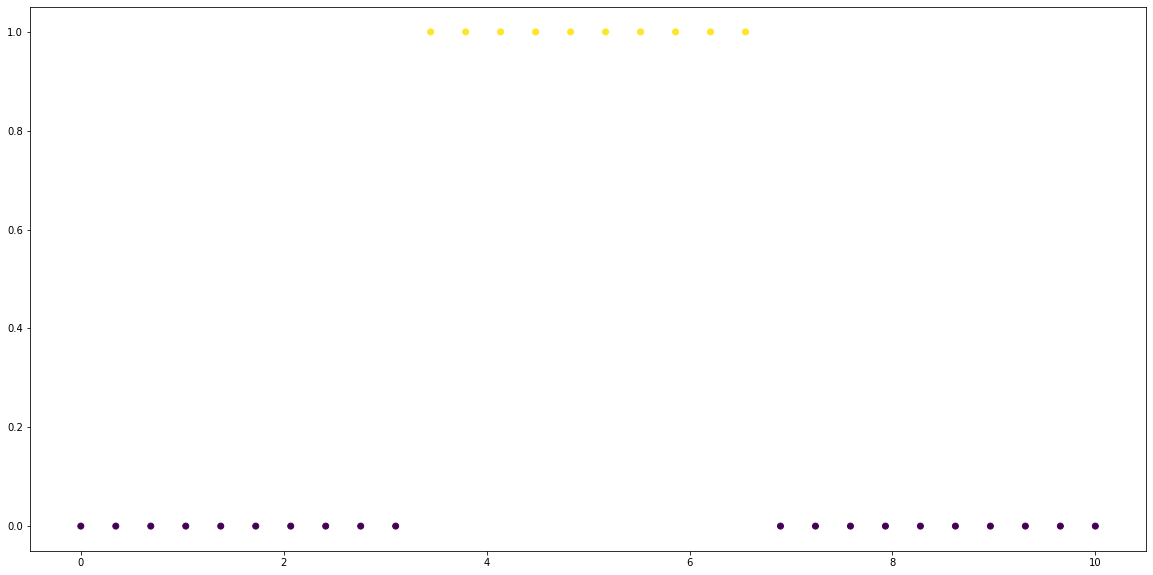

In [15]:
plt.scatter(x,y, c=y)

In [16]:
model.fit(x.reshape(-1, 1),y)

LogisticRegression()

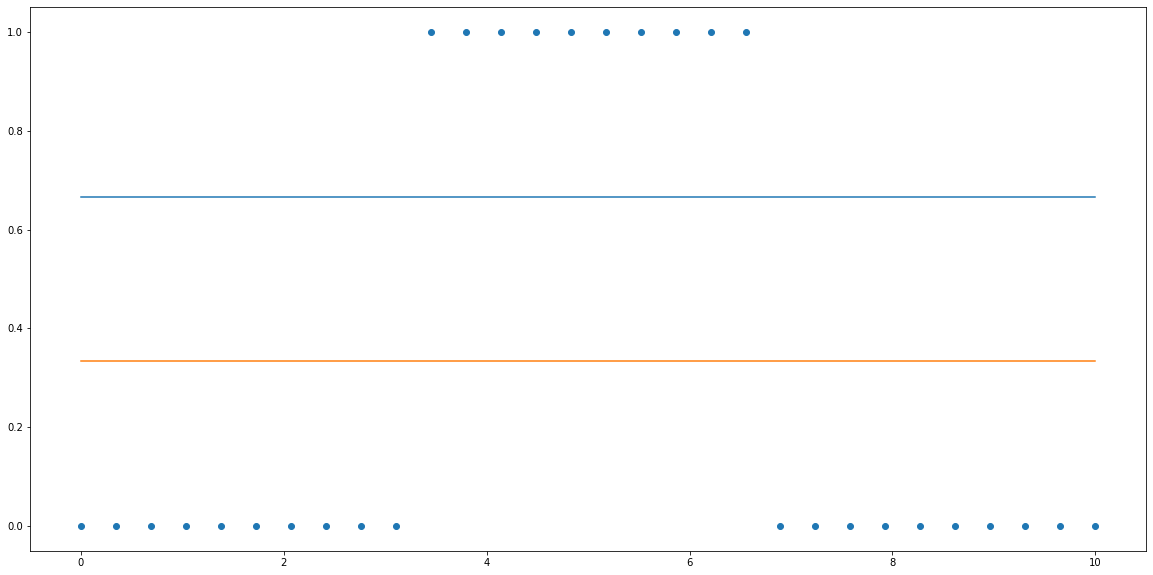

In [17]:
plt.scatter(x,y)
plt.plot(x, model.predict_proba(x.reshape(-1, 1)))

In [18]:
model1 = LogisticRegression()
model1.fit(x[:15].reshape(-1, 1),y[:15])

LogisticRegression()

In [19]:
model2 = LogisticRegression()
model2.fit(x[15:].reshape(-1, 1),y[15:])

LogisticRegression()

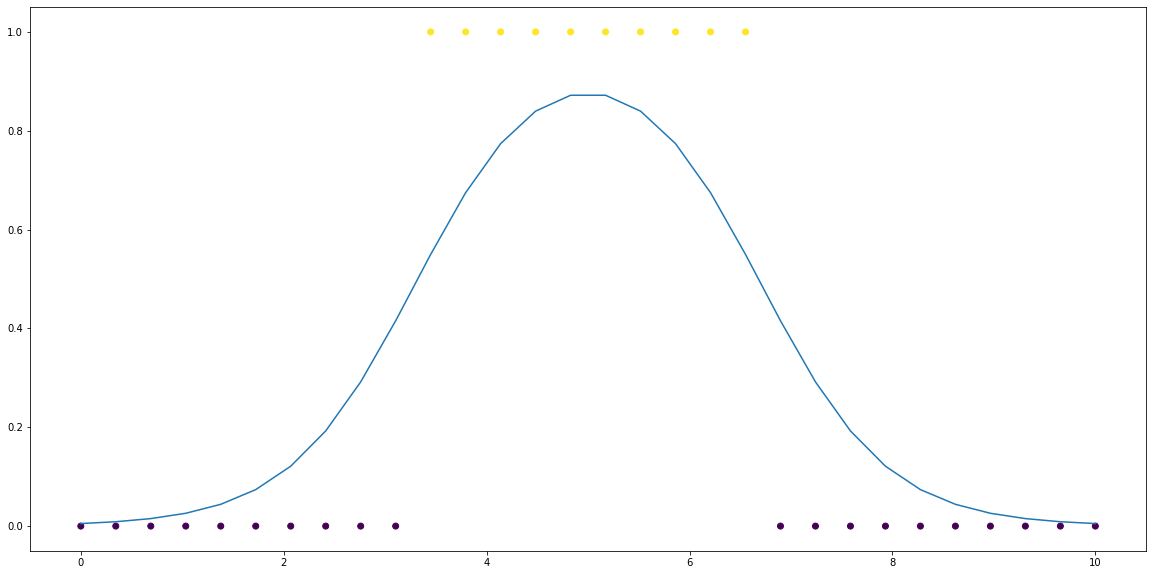

In [20]:
plt.scatter(x,y, c=y)
plt.plot(x, model1.predict_proba(x.reshape(-1, 1))[:,1] * model2.predict_proba(x.reshape(-1, 1))[:,1])

In [21]:
df = pd.read_csv('../data/adult.data', index_col=False)
golden = pd.read_csv('../data/adult.test', index_col=False)

In [22]:
from sklearn import preprocessing

enc = preprocessing.OrdinalEncoder()

In [23]:
transform_columns = ['sex', 'workclass', 'education', 'marital-status', 
                     'occupation', 'relationship', 'race', 'sex', 
                     'native-country', 'salary']

In [24]:
x = df.copy()

x[transform_columns] = enc.fit_transform(df[transform_columns])

golden['salary'] = golden.salary.replace(' <=50K.', ' <=50K').replace(' >50K.', ' >50K')
xt = golden.copy()

xt[transform_columns] = enc.transform(golden[transform_columns])

In [25]:
df.salary.unique()

array([' <=50K', ' >50K'], dtype=object)

In [26]:
golden.salary.replace(' <=50K.', ' <=50K').replace(' >50K.', ' >50K').unique()

array([' <=50K', ' >50K'], dtype=object)

In [27]:
model.fit(preprocessing.scale(x.drop('salary', axis=1)), x.salary)

LogisticRegression()

In [28]:
pred = model.predict(preprocessing.scale(x.drop('salary', axis=1)))
pred_test = model.predict(preprocessing.scale(xt.drop('salary', axis=1)))

In [29]:
x.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,7.0,77516,9.0,13,4.0,1.0,1.0,4.0,1.0,2174,0,40,39.0,0.0
1,50,6.0,83311,9.0,13,2.0,4.0,0.0,4.0,1.0,0,0,13,39.0,0.0
2,38,4.0,215646,11.0,9,0.0,6.0,1.0,4.0,1.0,0,0,40,39.0,0.0
3,53,4.0,234721,1.0,7,2.0,6.0,0.0,2.0,1.0,0,0,40,39.0,0.0
4,28,4.0,338409,9.0,13,2.0,10.0,5.0,2.0,0.0,0,0,40,5.0,0.0


In [30]:
from sklearn.metrics import (
    accuracy_score, 
    classification_report, 
    confusion_matrix, auc, roc_curve
)

In [31]:
accuracy_score(x.salary, pred)

0.8250360861152913

In [32]:
confusion_matrix(x.salary, pred)

array([[23300,  1420],
       [ 4277,  3564]], dtype=int64)

In [33]:
print(classification_report(x.salary, pred))

              precision    recall  f1-score   support

         0.0       0.84      0.94      0.89     24720
         1.0       0.72      0.45      0.56      7841

    accuracy                           0.83     32561
   macro avg       0.78      0.70      0.72     32561
weighted avg       0.81      0.83      0.81     32561



In [34]:
print(classification_report(xt.salary, pred_test))

              precision    recall  f1-score   support

         0.0       0.85      0.94      0.89     12435
         1.0       0.70      0.45      0.55      3846

    accuracy                           0.82     16281
   macro avg       0.77      0.69      0.72     16281
weighted avg       0.81      0.82      0.81     16281



# Assignment 

## 1. Use your own dataset (create a train and a test set) and build 2 models: Logistic Regression and Decision Tree (shallow). Compare the test results using `classification_report` and `confusion_matrix`. Which algorithm is superior?
## 2. Repeat 1. but let the Decision Tree be much deeper to allow over-fitting. Compare the two models' test results again, and explain why it's superior

#### In fantasy football a player will either boom or bust which means the actual points the individual player scores will be significantly above the projected score or significantly below the projected score respectively. For simplicity purposes, I will only predict whether a player will boom as '1' and not boom as '0'. The exact calculation for booms and busts is widely unknown, however I will use a simple cutoff at 10%, meaning that if the player's actual score is >=10% of their projected score then I will consider that a boom, every other case is a not boom.

##### The dataset used came from this site: https://www.fantasyfootballdatapros.com/csv_files which shows players actual scores, projected scores for each week.

In [579]:

from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math
import re
plt.rcParams['figure.figsize'] = [10, 5]
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report, 
    confusion_matrix, auc, roc_curve,
    roc_auc_score
)

In [251]:
df_orig = pd.read_csv("NFL Play by Play 2009-2018 (v5).csv")

C:\Users\gdlev\AppData\Local\Temp\ipykernel_16520\1755615869.py:1: DtypeWarning: Columns (42,166,167,168,169,174,175,178,179,182,183,188,189,190,191,194,195,203,204,205,218,219,220,231,232,233,238,240,241,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df_orig = pd.read_csv("NFL Play by Play 2009-2018 (v5).csv")


In [583]:
df = df_orig.copy()
df = df.loc[df['play_type'] == 'pass']
col_list = df.columns
time_cols = [col for col in col_list if re.search(r"seconds_remaining", col)]


In [584]:
# interception: target
# pass_length: "deep", "short"
# pass_location: "left", "right", "middle"
# total_home_pass_epa: cumulative total passing EPA for home team
# total_away_pass_epa: cumulative total passing EPA for away team
# ydsnet: numeric value for total yards gained on given drive respective to home team
# anything with total or score
# result all respective to home team, so if negative means home team lost
# drive_start_yardline, drive_end_yard_line
# yardline_100 distance to oppoents endzone
# yrdln: current field position
# ydstogo: either first down or endzone
#  air_yards: number of yards ball was in air
# seconds remaining
# shotgun


In [687]:
col_list = [
    "qb_dropback",
    "no_huddle",
    "posteam_score",
    "defteam_score",
    "score_differential",
    "shotgun",
    "no_huddle",
    "pass_length",
    "pass_location",
    "down",
    "ydstogo",
    "yardline_100",
    "posteam_type",
    "qtr",
    "game_half",
    "posteam_timeouts_remaining",
    "defteam_timeouts_remaining"
    
]
col_list.extend(time_cols)

In [688]:
df_model = df[col_list]
df_model['id'] = range(0, len(df_model))
df_model = df_model.dropna()

C:\Users\gdlev\AppData\Local\Temp\ipykernel_16520\491085233.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['id'] = range(0, len(df_model))


In [689]:
cat_cols = ['pass_length', 'pass_location', 'game_half', 'posteam_type', 'qb_dropback', 'no_huddle']
num_cols = list(set(df_model.columns) - set(cat_cols))
num_cols.remove('interception')
num_cols.remove('id')
target_col = 'interception'

In [706]:
X_df = pd.concat([df_model['id'],df_model[num_cols],pd.get_dummies(df_model[cat_cols])], axis = 1)
y_df = pd.concat([df_model['id'],df_model[target_col]], axis = 1)
y_df = y_df.loc[y_df.id.isin(list(X_df.id))]

X_df = X_df.drop('id', axis = 1)
y_df = y_df.drop('id', axis = 1)

In [707]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, train_size = 0.7)

In [708]:
ideal_sample = math.ceil(df_model.interception.value_counts()[1] * 3)
print(ideal_sample)
df_Train = pd.concat([X_train, y_train], axis = 1)
int_Train = df_Train.loc[df_Train['interception'] == 1]
nonint_Train = df_Train.loc[df_Train['interception'] == 0].sample(ideal_sample)

df_train = pd.concat([int_Train, nonint_Train], axis = 0).sample(frac = 1)

X_train = df_train.drop('interception', axis = 1)
y_train = df_train[['interception']]

12843


In [709]:
# class_weight = 'balanced', penalty = 'l1', solver = 'liblinear'
logit = linear_model.LogisticRegression(class_weight = 'balanced', penalty = 'l1', solver = 'liblinear')

In [710]:
logit.fit(X_train, y_train)

c:\Users\gdlev\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\gdlev\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [711]:
def get_accuracies(y_true, preds):
    acc = accuracy_score(y_true, preds)
    f1 = f1_score(y_true, preds)
    auc = roc_auc_score(y_true, preds)
    confus = confusion_matrix(y_true, preds)
    classif = classification_report(y_true, preds)
    
    return [acc,f1,auc, confus, classif]

In [712]:
df_model.describe()

,interception,shotgun,no_huddle,down,ydstogo,yardline_100,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,id
count,173850.000000,173850.000000,173850.000000,173850.000000,173850.000000,173850.000000,173850.000000,173850.000000,173850.000000,173850.000000
mean,0.024625,0.698062,0.103837,1.932994,8.929842,52.985246,419.047570,809.746448,1701.877596,93325.843296
std,0.154979,0.459100,0.305049,0.843030,3.972534,23.983619,272.915249,547.474429,1039.432938,53883.072408
min,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,7.000000,35.000000,165.000000,298.000000,795.000000,46633.250000
50%,0.000000,1.000000,0.000000,2.000000,10.000000,57.000000,404.000000,785.000000,1794.000000,93416.500000
75%,0.000000,1.000000,0.000000,3.000000,10.000000,73.000000,657.000000,1282.000000,2557.000000,139992.750000
max,1.000000,1.000000,1.000000,4.000000,50.000000,99.000000,900.000000,1800.000000,3600.000000,186676.000000


Logistic Regression: 

Accuracy: 96.92%

F1-Score: 6.62%

AUC Score: 51.84%

Confusion Matrix:
 [[50491   370]
 [ 1238    57]]

Classification Report:

               precision    recall  f1-score   support

         0.0       0.98      0.99      0.98     50861
         1.0       0.13      0.04      0.07      1295

    accuracy                           0.97     52156
   macro avg       0.55      0.52      0.53     52156
weighted avg       0.96      0.97      0.96     52156





c:\Users\gdlev\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


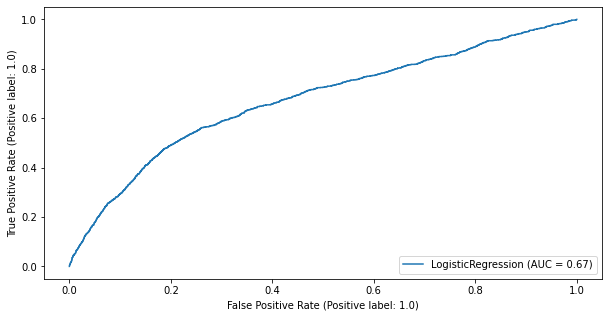

In [713]:
preds = logit.predict(X_test)
model_type = "Logistic Regression"
acc_list = get_accuracies(y_test, preds)

print(f"\033[1m{model_type}\033[0m: \n\nAccuracy: {acc_list[0] * 100:.2f}%\n\nF1-Score: {acc_list[1] * 100:.2f}%\n\nAUC Score: {acc_list[2] * 100:.2f}%\n\nConfusion Matrix:\n {acc_list[3]}\n\nClassification Report:\n\n {acc_list[4]}\n\n")

metrics.plot_roc_curve(logit, X_test, y_test)
        

In [698]:
dt = DecisionTreeClassifier(max_depth = 20)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=20)

Decision Tree Classifier: 

Accuracy: 79.71%

F1-Score: 7.31%

AUC Score: 56.21%

Confusion Matrix:
 [[41157  9673]
 [  909   417]]

Classification Report:

               precision    recall  f1-score   support

         0.0       0.98      0.81      0.89     50830
         1.0       0.04      0.31      0.07      1326

    accuracy                           0.80     52156
   macro avg       0.51      0.56      0.48     52156
weighted avg       0.95      0.80      0.87     52156





c:\Users\gdlev\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


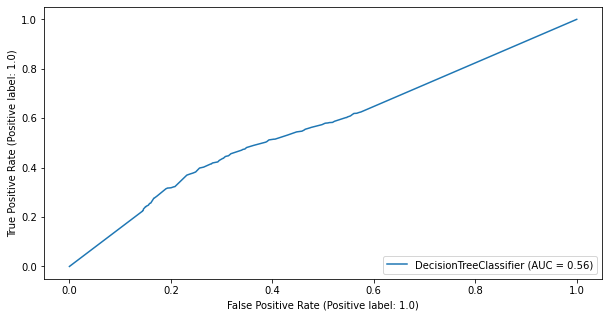

In [699]:
preds = dt.predict(X_test)
model_type = "Decision Tree Classifier"
acc_list = get_accuracies(y_test, preds)

print(f"\033[1m{model_type}\033[0m: \n\nAccuracy: {acc_list[0] * 100:.2f}%\n\nF1-Score: {acc_list[1] * 100:.2f}%\n\nAUC Score: {acc_list[2] * 100:.2f}%\n\nConfusion Matrix:\n {acc_list[3]}\n\nClassification Report:\n\n {acc_list[4]}\n\n")

metrics.plot_roc_curve(dt, X_test, y_test)